In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **Motor Vehicle Thefts**

In [178]:
# Custom rc definitions
rc = {
        'axes.spines.right': True,
        'axes.spines.top': True,
        'font.family': ['sans-serif'],
        'font.sans-serif':
        # 'Arial',
        'DejaVu Sans',
        # 'Liberation Sans',
        # 'Bitstream Vera Sans',
        # 'sans-serif',
        "xtick.bottom":True,
        'axes.edgecolor': 'indigo',
        'xtick.color': 'black',
        'figure.facecolor': "snow",
        'grid.color': 'grey',
        
}


# font definitions
font_label = {'family': 'serif',
        'color':  'darkred',
        'weight': 'semibold',
        'size': 16,
        }

font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }

font_fig = {'family': 'sans',
        'color':  'chocolate',
        # 'weight': 'bold', # doesn't apply to it. Must be specified independently
        # 'fontsize': 30, # doesn't apply to it. Must be specified independently
        }

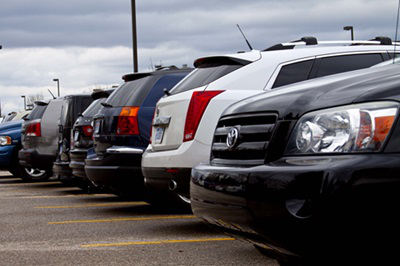

In [2]:
from PIL import Image
img =Image.open("../img/cars_lot.jpeg")
img

## **Loading the data**

In [3]:
locations = pd.read_csv("../data/locations.csv")
make_details = pd.read_csv("../data/make_details.csv")
stolen_vehicles = pd.read_csv("../data/stolen_vehicles.csv")

## **Getting to know the data**

### **Locations**

In [31]:
locations_cleaning = locations.copy()

In [32]:
# checking for null values
locations_cleaning.isna().sum()

location_id    0
region         0
country        0
population     0
density        0
dtype: int64

In [34]:
# Checking for duplicates
print(f"How many duplicates: {locations_cleaning.duplicated().sum()}")

# # Removal of duplicates
# locations_cleaning.drop_duplicates(inplace=True)

How many duplicates: 0


In [35]:
print(f"locations shape: {locations_cleaning.shape}\n")
print(f"locations dimension: {locations_cleaning.ndim}\n")
print(f"locations data types: \n{locations_cleaning.dtypes}")
locations_cleaning.head()

locations shape: (16, 5)

locations dimension: 2

locations data types: 
location_id      int64
region          object
country         object
population      object
density        float64
dtype: object


,location_id,region,country,population,density
0,101,Northland,New Zealand,"201,500",16.11
1,102,Auckland,New Zealand,"1,695,200",343.09
2,103,Waikato,New Zealand,"513,800",21.50
3,104,Bay of Plenty,New Zealand,"347,700",28.80
4,105,Gisborne,New Zealand,"52,100",6.21


In [36]:
locations_cleaning.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location_id  16 non-null     int64  
 1   region       16 non-null     object 
 2   country      16 non-null     object 
 3   population   16 non-null     object 
 4   density      16 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.5 KB


In [37]:
locations_cleaning.describe(include=np.number)

,location_id,density
count,16.000000,16.000000
mean,108.500000,43.300625
std,4.760952,86.218074
min,101.000000,1.410000
25%,104.750000,6.182500
50%,108.500000,13.820000
75%,112.250000,23.325000
max,116.000000,343.090000


In [38]:
locations_cleaning.describe(include=np.object)

,region,country,population
count,16,16,16
unique,16,1,16
top,Gisborne,New Zealand,"1,695,200"
freq,1,16,1


**Observations**
- change the data type of population to int32
- change th data type of location_id to int8
- change all objects to categories

In [39]:
# Data conversion and memory management
location_data_memory = locations_cleaning.copy()
location_data_memory.population = location_data_memory.population.str.replace(",",'').astype("int32")

# Memory management
def memory_magment(df):
    for col in df.columns:
        col_type = df[col].dtype


        if col_type == np.number:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8) # int 8
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16) # int 16
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)  # in 32
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64) # int 64 
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].round(3)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].round(3)
                else:
                    df[col] = df[col].round(3) # float64

        elif col_type == np.object:
            df[col] = df[col].astype('category')   
        elif col_type == pd.CategoricalDtype:
            df[col] = df[col].astype('category')   

    return df

location_data_memory = memory_magment(location_data_memory)

In [40]:
location_data_memory.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   location_id  16 non-null     int64   
 1   region       16 non-null     category
 2   country      16 non-null     category
 3   population   16 non-null     int32   
 4   density      16 non-null     float64 
dtypes: category(2), float64(1), int32(1), int64(1)
memory usage: 2.3 KB


- Memory has reduced from 3.5 to 2.3KB
- All target columns has been modified

In [41]:
location_data_memory.head()

,location_id,region,country,population,density
0,101,Northland,New Zealand,201500,16.11
1,102,Auckland,New Zealand,1695200,343.09
2,103,Waikato,New Zealand,513800,21.50
3,104,Bay of Plenty,New Zealand,347700,28.80
4,105,Gisborne,New Zealand,52100,6.21


Let's get the area from using the population density formula
$$\ population-density= \frac{population}{area(km)^2}

In [50]:
location_featured = location_data_memory.copy()
location_featured["area"] = (location_featured['population']/location_featured['density']).round(3)

In [55]:
location_featured.area.dtype # it's a float64

dtype('float64')

In [51]:
location_featured.describe(include=np.number)

,location_id,population,density,area
count,16.000000,1.600000e+01,16.000000,16.000000
mean,108.500000,3.202000e+05,43.300625,16506.952000
std,4.760952,4.149945e+05,86.218074,11796.387108
min,101.000000,3.270000e+04,1.410000,421.990000
25%,104.750000,5.765000e+04,6.182500,8304.637250
50%,108.500000,1.921000e+05,13.820000,12290.338000
75%,112.250000,3.892250e+05,23.325000,23368.035250
max,116.000000,1.695200e+06,343.090000,44497.283000


In [68]:
cat_columns = location_featured.select_dtypes(include=pd.CategoricalDtype)
cat_columns
for column in cat_columns:
    print(f"These are the values in the {column} column:\n{location_featured[column].unique().tolist()}\n")
    print(f"This is the total values present in the: {column} column:\n{location_featured[column].nunique()}\n")

These are the values in the region column:
['Northland', 'Auckland', 'Waikato', 'Bay of Plenty', 'Gisborne', "Hawke's Bay", 'Taranaki', 'Manawatū-Whanganui', 'Wellington', 'Tasman', 'Nelson', 'Marlborough', 'West Coast', 'Canterbury', 'Otago', 'Southland']

This is the total values present in the: region column:
16

These are the values in the country column:
['New Zealand']

This is the total values present in the: country column:
1



In [69]:
location_featured.head()

,location_id,region,country,population,density,area
0,101,Northland,New Zealand,201500,16.11,12507.759
1,102,Auckland,New Zealand,1695200,343.09,4940.978
2,103,Waikato,New Zealand,513800,21.50,23897.674
3,104,Bay of Plenty,New Zealand,347700,28.80,12072.917
4,105,Gisborne,New Zealand,52100,6.21,8389.694


**For EDA**

- Check which region has the highest population
- Check which region has the highest population density
- Check which region has the highest area

**Suggested chart(s):** *Bar Chart*

In [125]:
# Not sorted
location_featured.head()

,location_id,region,country,population,density,area
0,101,Northland,New Zealand,201500,16.11,12507.759
1,102,Auckland,New Zealand,1695200,343.09,4940.978
2,103,Waikato,New Zealand,513800,21.50,23897.674
3,104,Bay of Plenty,New Zealand,347700,28.80,12072.917
4,105,Gisborne,New Zealand,52100,6.21,8389.694


In [160]:
# Sorted
location_featured.sort_values(by="population", ascending=False).head()

,location_id,region,country,population,density,area
1,102,Auckland,New Zealand,1695200,343.09,4940.978
13,114,Canterbury,New Zealand,655000,14.72,44497.283
8,109,Wellington,New Zealand,543500,67.52,8049.467
2,103,Waikato,New Zealand,513800,21.50,23897.674
3,104,Bay of Plenty,New Zealand,347700,28.80,12072.917


In [196]:
population_ordering = location_featured.sort_values(by="population", ascending=False)['region'].to_list()
density_ordering = location_featured.sort_values(by="density", ascending=False)['region'].to_list()
area_ordering = location_featured.sort_values(by="area", ascending=False)['region'].to_list()

In [210]:
# fig,ax = plt.subplots(1,figsize=(20,10),constrained_layout=True)
# sns.barplot(data=location_featured,x="region",y="population",order=population_ordering)
# ax.set_xticklabels(labels=population_ordering,rotation=90, fontsize=20)

In [194]:
def plotting_bar(data:pd.DataFrame,y:str,ordering=None):
    try:
        fig,ax = plt.subplots(1,figsize=(20,10),constrained_layout=True)
        sns.set_theme(style='whitegrid',rc=rc,palette='Set2')
        sns.barplot(data=data,x="region",y=y,order=ordering)

        ax.set_title(f"{y} bar plot",fontdict=font_title)
        ax.set_xlabel(f"Region",fontdict=font_label)
        ax.set_ylabel(f"{y}",fontdict=font_label)
        
        if ordering == None:
            labels = data['region'].to_list()
            ax.set_xticklabels(labels=labels,rotation=90, fontsize=20)
        else:
            ax.set_xticklabels(labels=ordering,rotation=90, fontsize=20)
    except KeyError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        data.info(memory_usage='deep')

In [ ]:
# plotting_bar(location_featured,'population',ordering=population_ordering)

In [205]:
num_list = location_featured.select_dtypes(include=np.number).columns.to_list()
# pop the first element
# num_list.pop(0)
num_list

['population', 'density', 'area']

In [206]:
orders = [population_ordering,density_ordering,area_ordering]

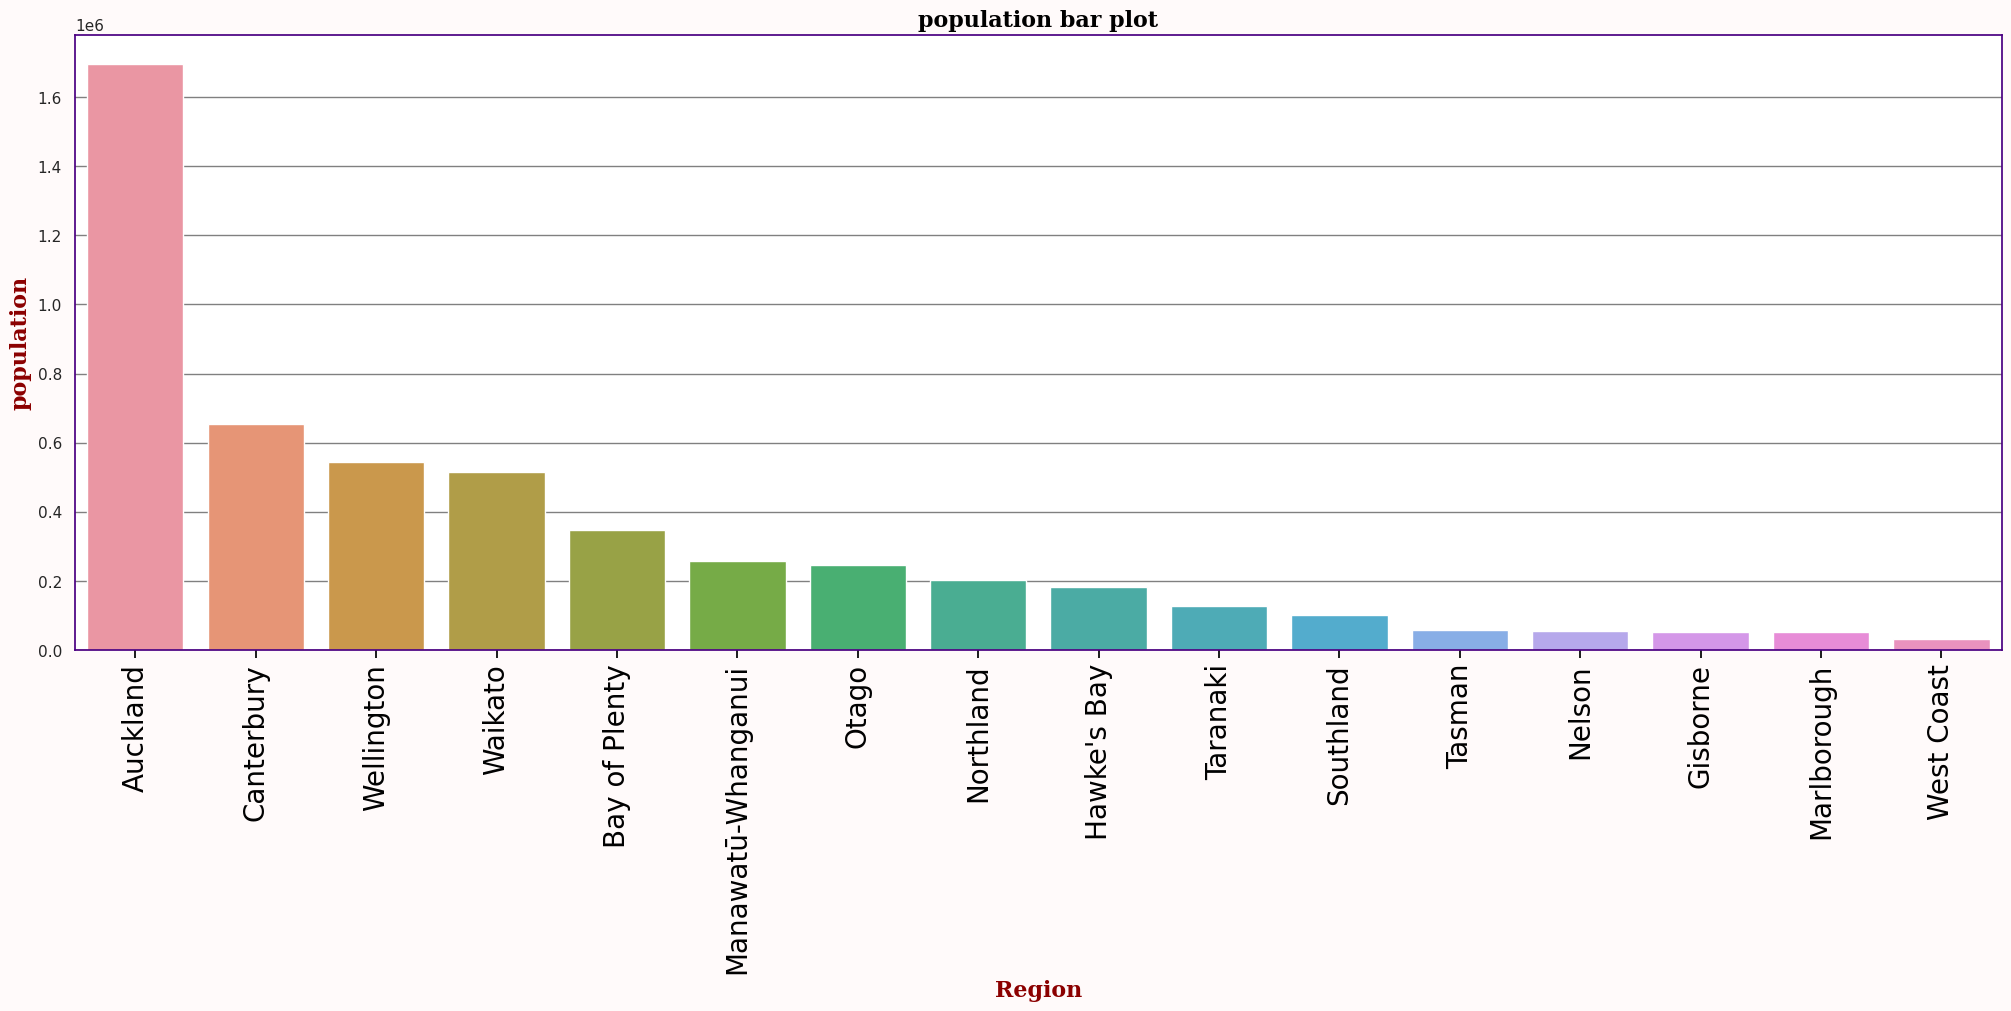

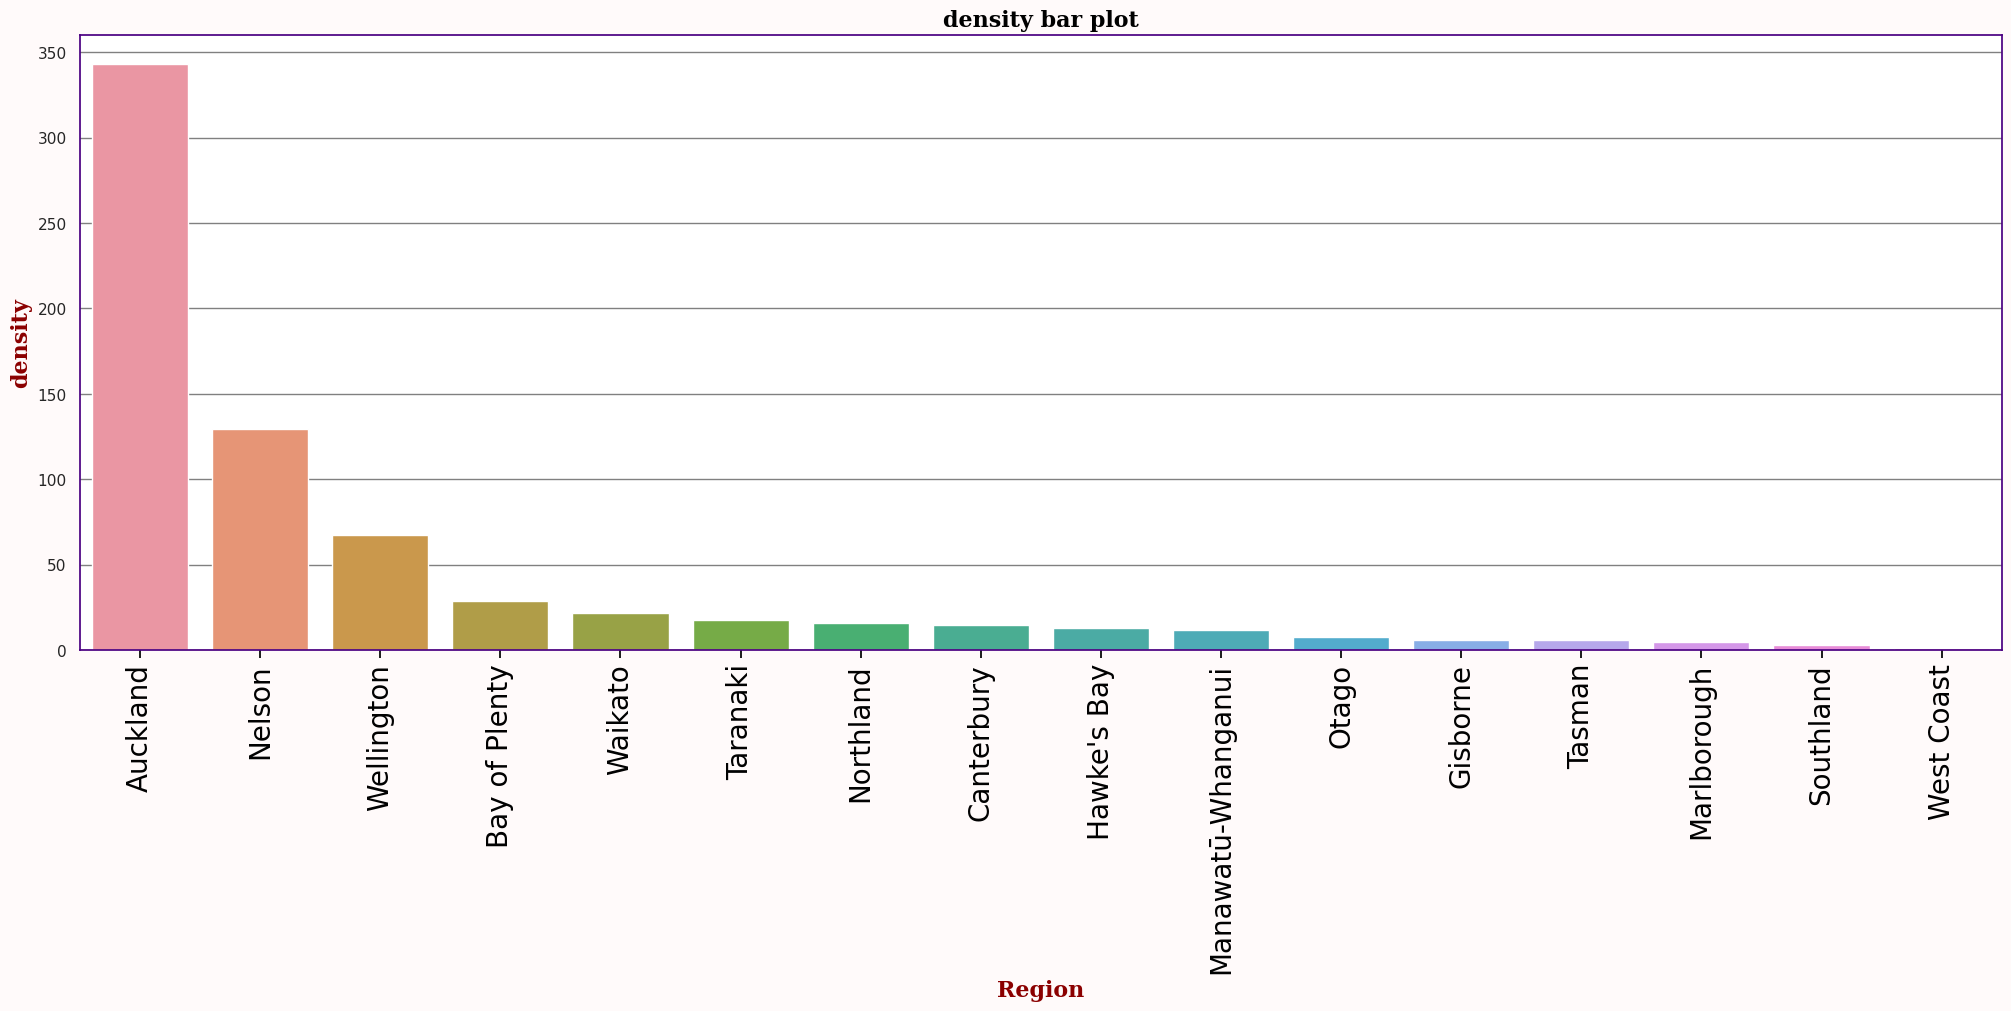

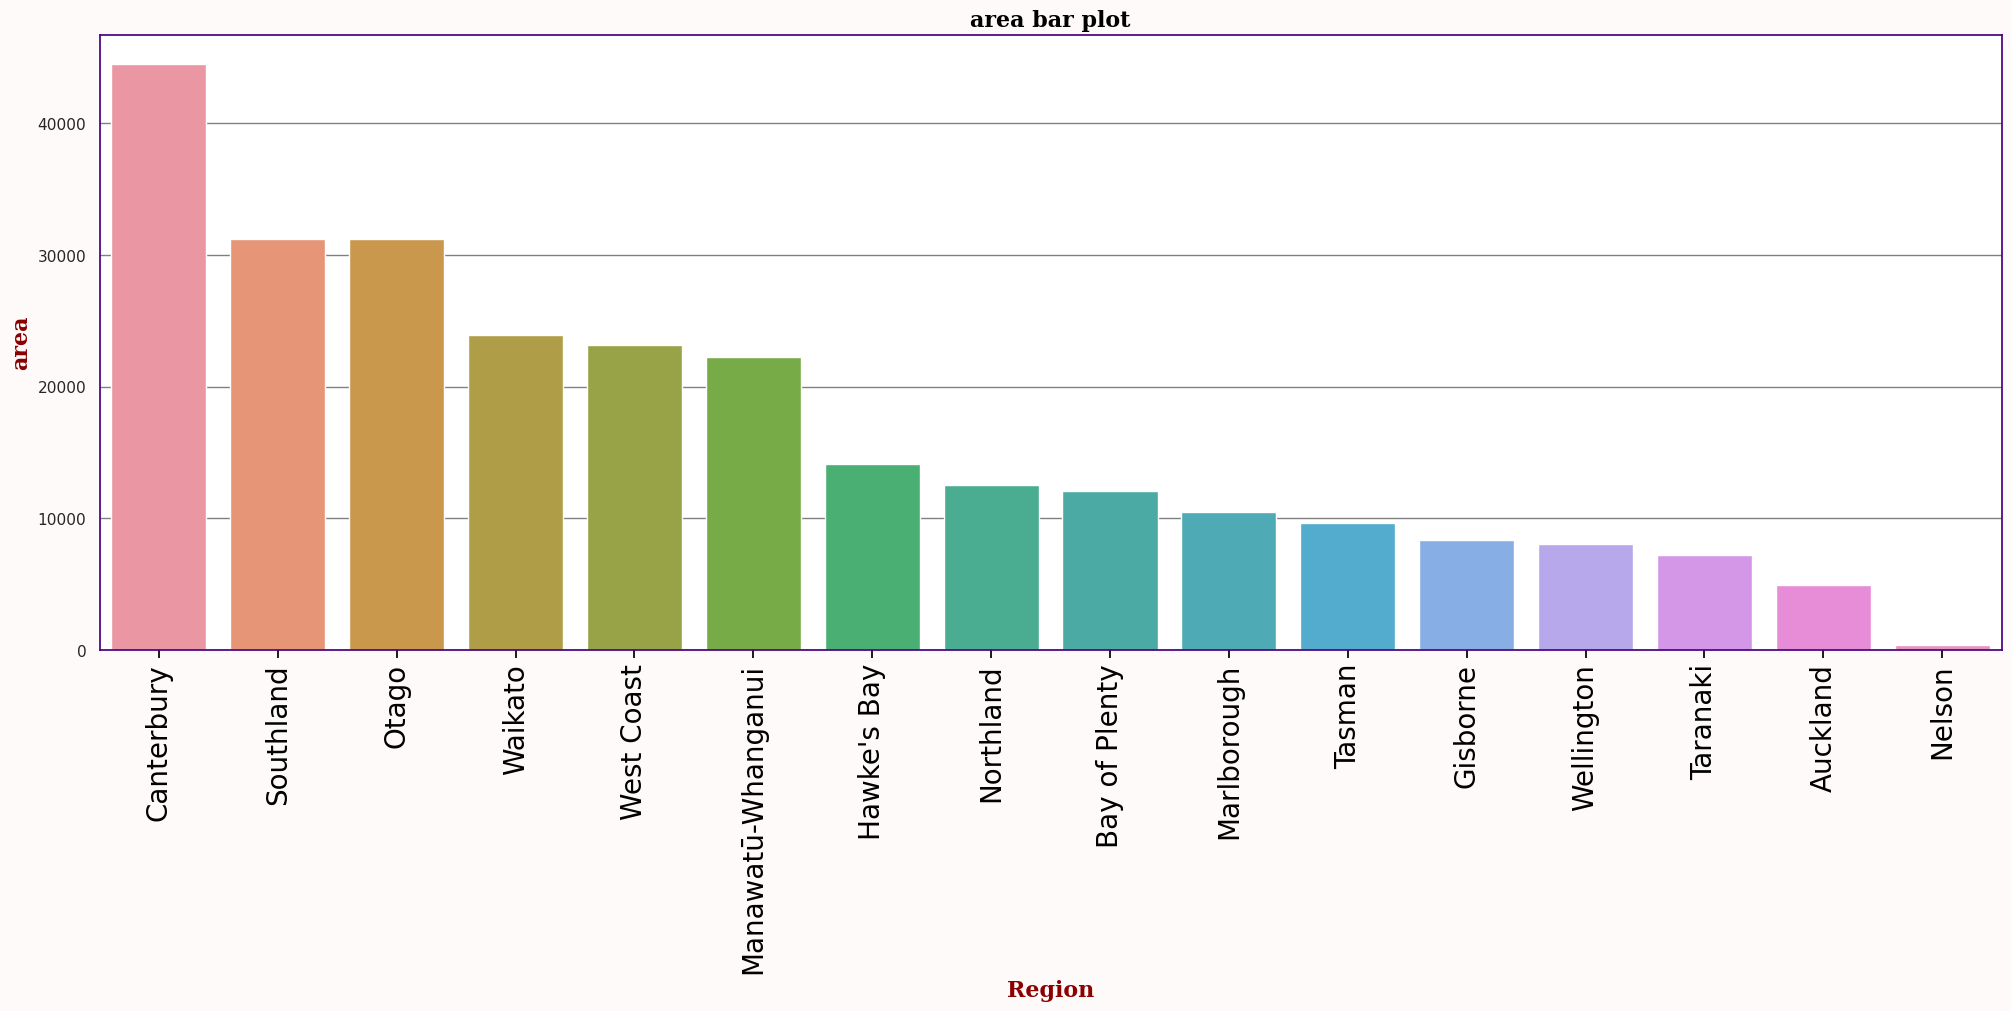

In [211]:
for y,ordering in zip(num_list,orders):
    plotting_bar(location_featured,y,ordering=ordering)

In [213]:
num_list = location_featured.select_dtypes(include=np.number).columns.to_list()
num_list

['location_id', 'population', 'density', 'area']

In [214]:
corr = location_featured[num_list].corr()

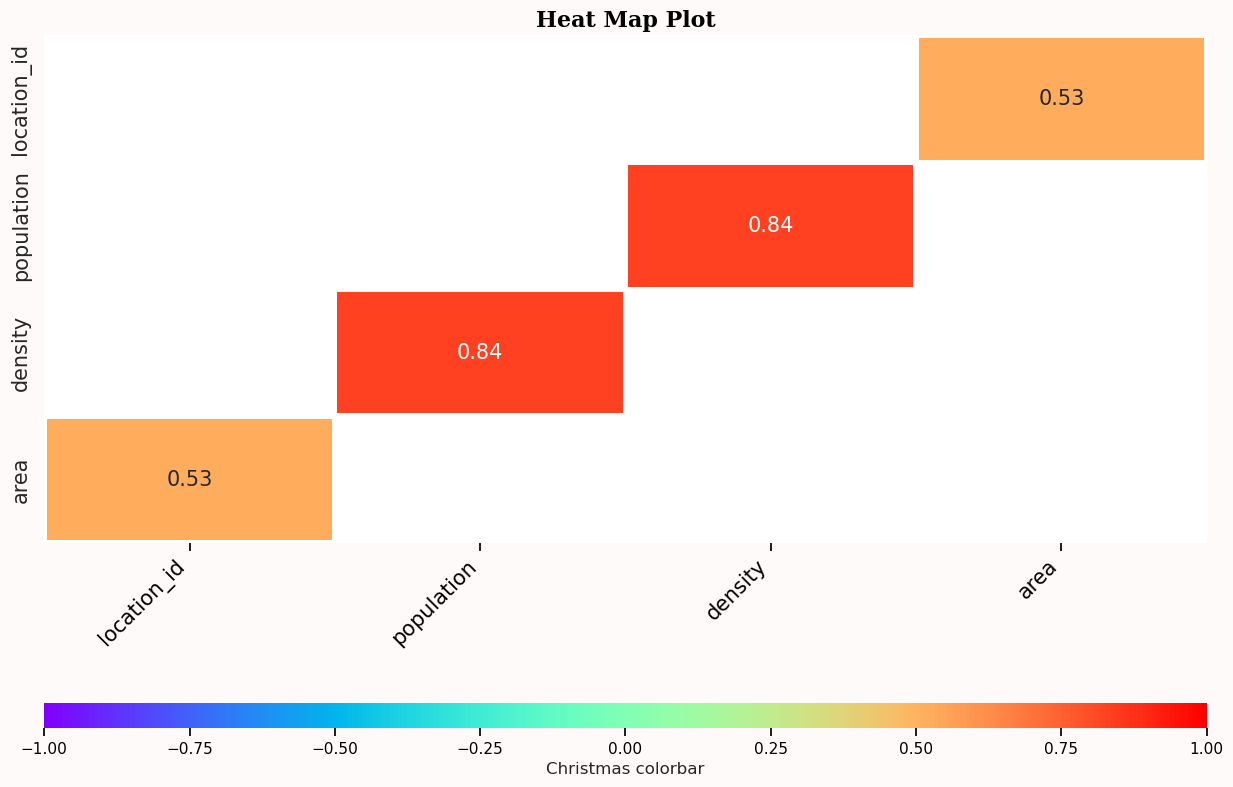

In [221]:
cond = (corr <= -.5) | (corr >= .5)
filter_corr  = corr[(cond) & (corr!=1)]
sns.set_theme(style='whitegrid',rc=rc)
grid_kws = {"height_ratios": (1,.05),"hspace":.6}
fig, (ax,cbar_ax) = plt.subplots(2,figsize=(15,9),gridspec_kw=grid_kws)

heatmap = sns.heatmap(
    filter_corr,
    ax=ax,
    cbar_ax=cbar_ax,
    cmap='rainbow',
    annot=True,
    annot_kws={'size': 15},
    vmin=-1,
    vmax=1,
    cbar_kws={"orientation":"horizontal",'label':"Christmas colorbar"},
    linewidths=3
)
# Rotate x-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right',fontsize=15)
heatmap.set_yticklabels(heatmap.get_yticklabels(),fontsize=15)
heatmap.set_title("Heat Map Plot",fontdict=font_title)
plt.show()

In [237]:
def plotting_lines(data,x:str,y:str):
    try:
        sns.set_theme(style='whitegrid',palette='husl',rc=rc)
        fig,ax = plt.subplots(figsize=(20,10))
        sns.lineplot(data=data,x=x,y=y)
        ax.set_title(f'Line plot of {x} vs {y}',fontdict=font_title)
        ax.set_xlabel(f'{x}',fontdict=font_label)
        ax.set_ylabel(f'{y}',fontdict=font_label)
    except ValueError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        data.info(memory_usage='deep')

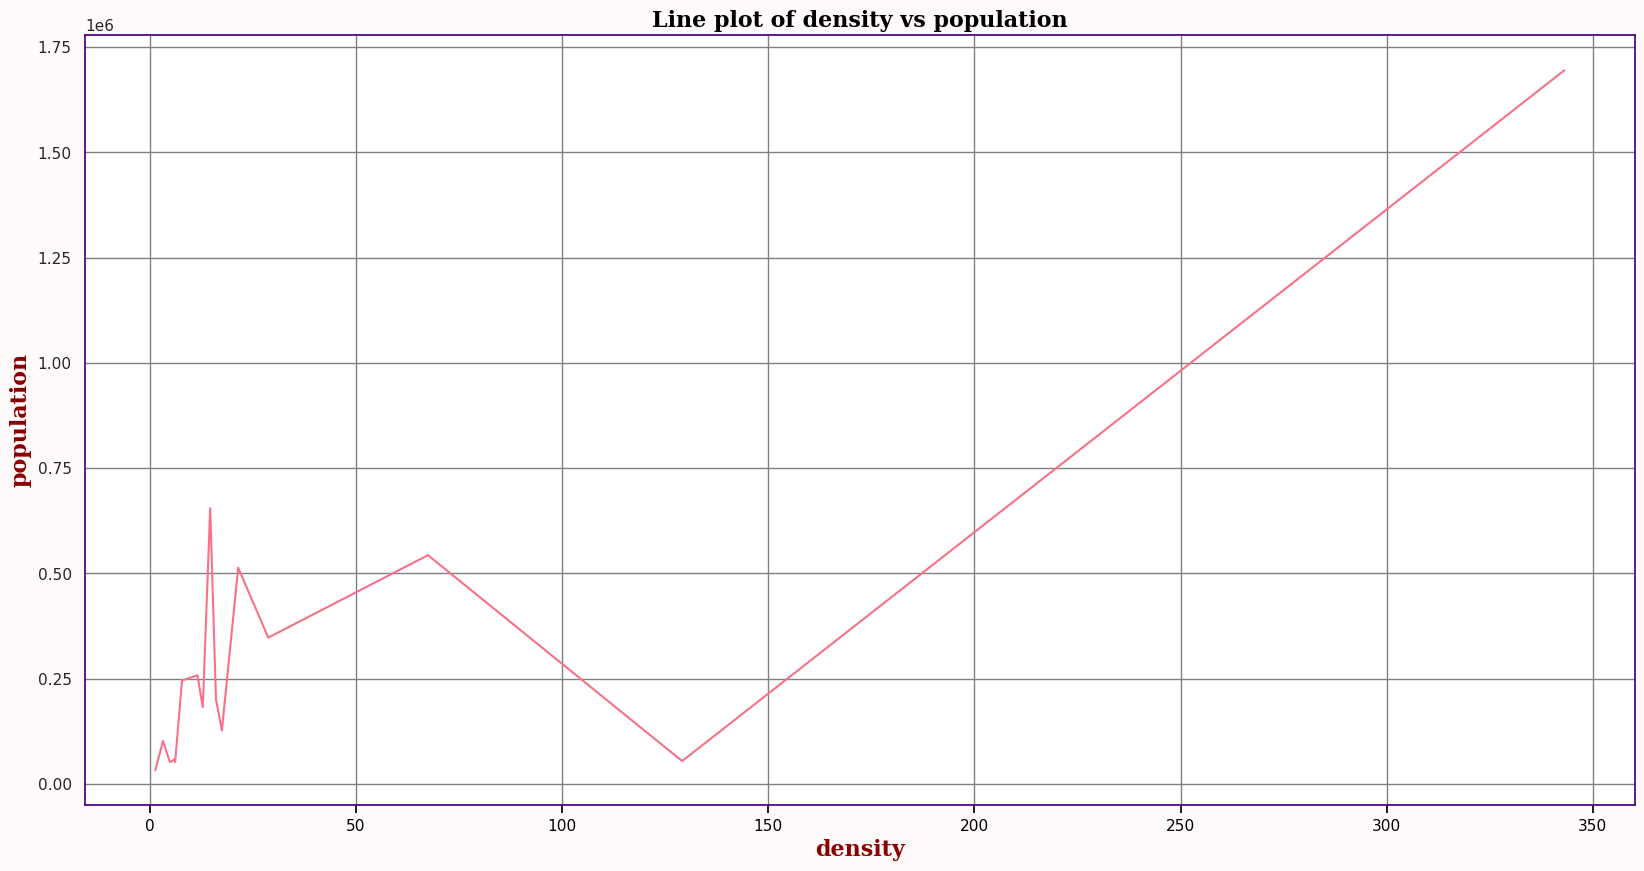

In [236]:
plotting_lines(location_featured,'density','population')

In [226]:
def plotting_scatter(data,x:str,y:str):
    try:
        sns.set_theme(style='darkgrid',palette='bright',rc=rc)
        fig,ax = plt.subplots(figsize=(20,10))
        sns.scatterplot(data=data,x=x,y=y) #,hue='gender')
        ax.set_title(f'Line plot of {x} vs {y}',fontdict=font_title)
        ax.set_xlabel(f'{x}',fontdict=font_label)
        ax.set_ylabel(f'{y}',fontdict=font_label)
    except ValueError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        data.info(memory_usage='deep')

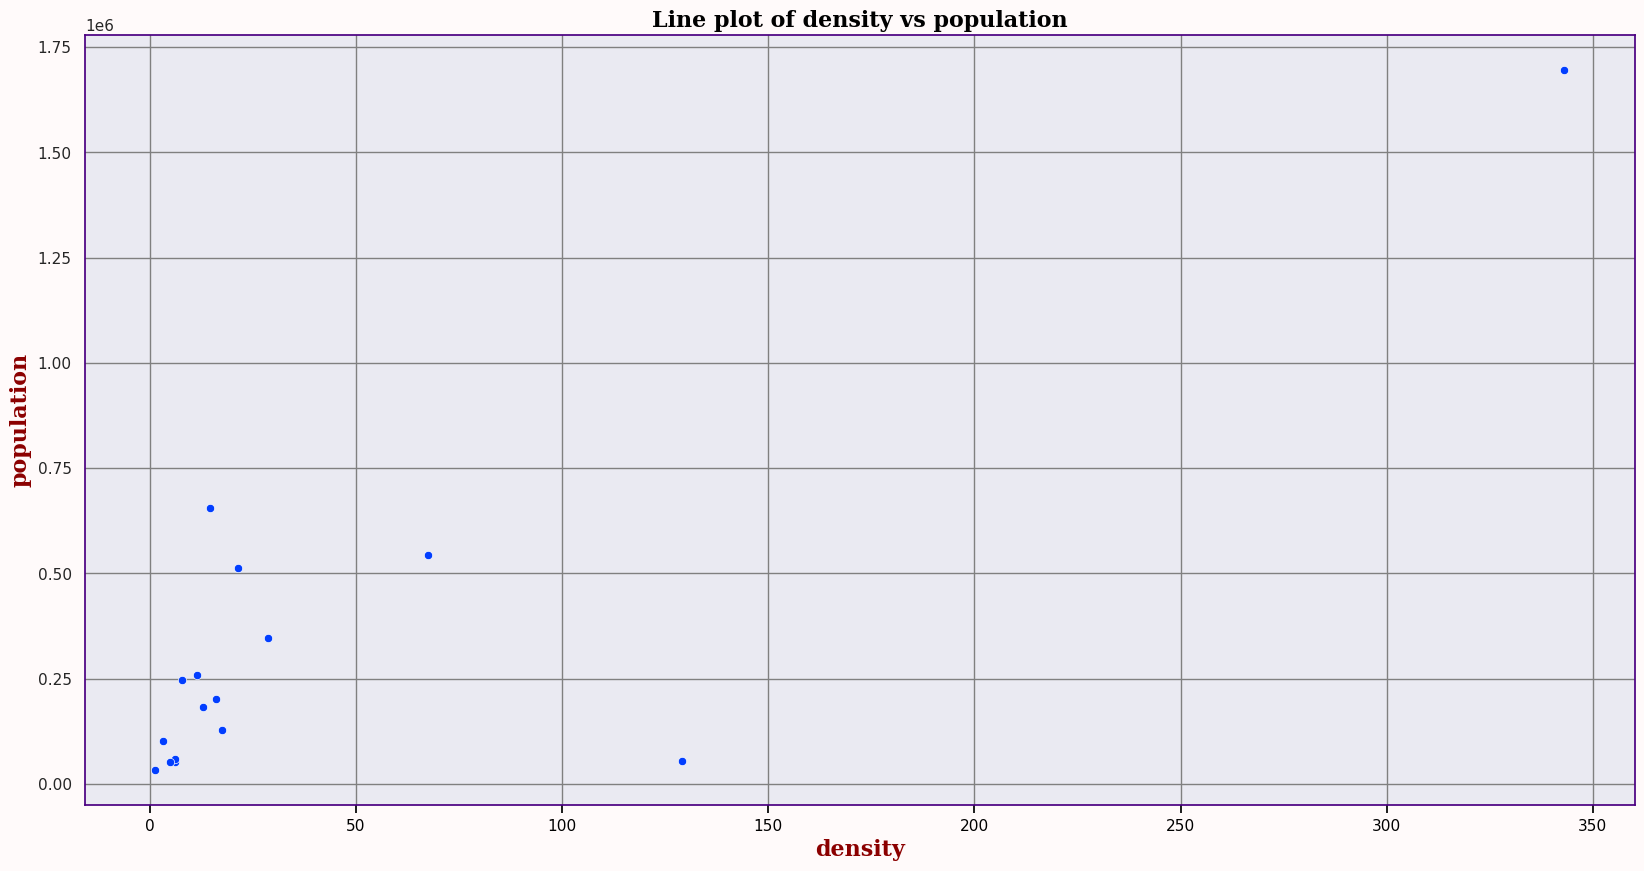

In [227]:
plotting_scatter(location_featured,'density','population')

**Observations**
- Top five locations with high population are;
    - Auckland
    - Canterbury
    - Wellington
    - Waikato
    - Bay of Plenty
- Top five locations with high density are;
    - Auckland
    - Nelson
    - Wellington
    - Bay of Plenty
    - Waikato
-  Canterbury has the highest area and is the seccond most populated region, but suprisingly Auckland has a very low area $(km^2)$

- Based of the heat map, there is a strong correlation between popullation and population density; a higher population will have a higher population density

### **make_details**

In [5]:
print(f"make_details shape: {make_details.shape}")
make_details.sample(10,random_state=42)

make_details shape: (138, 3)


,make_id,make_name,make_type
89,590,Over,Standard
105,606,Sprite,Standard
12,513,Bricon,Standard
26,527,Custombuilt,Standard
64,565,KTM,Standard
67,568,Land Rover,Luxury
65,566,Kymco,Standard
117,618,Toko,Standard
108,609,Sterling,Standard
73,574,Maserati,Luxury


### **stolen_vehicles**

In [6]:
print(f"stolen_vehicles shape: {stolen_vehicles.shape}")
stolen_vehicles.sample(10,random_state=42)

stolen_vehicles shape: (4553, 8)


,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
471,472,Trailer,623.0,2017.0,TRANSPORT MGE,Silver,2/28/22,103
1971,1972,Saloon,633.0,2004.0,PASSAT,Blue,10/21/21,115
23,24,Trailer - Heavy,623.0,2021.0,CT DIG 25,Silver,11/12/21,102
2702,2703,Saloon,512.0,2001.0,318I,Silver,2/27/22,102
135,136,Trailer,623.0,2019.0,HOMEBUILT,Silver,3/13/22,115
3303,3304,Hatchback,576.0,2009.0,DEMIO,Silver,3/29/22,102
3337,3338,Utility,619.0,2018.0,HILUX,Silver,11/30/21,115
4206,4207,Trailer,549.0,1994.0,TRAILER,Silver,11/4/21,107
3128,3129,Stationwagon,512.0,2007.0,320I,Silver,3/6/22,102
3262,3263,Saloon,610.0,2007.0,LEGACY,Grey,4/3/22,102
